1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2 - Load Data

In [2]:
df_purchase_predictors = pd.read_csv('customer-segmented.csv')
df_purchase_predictors

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,3
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,3
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,3
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,3
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,3
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,3


3 - Customer Analysis

In [3]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns={'Incidence': 'Number_Visits'})
temp1.head()

,Number_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [4]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence': 'Number_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,Number_Visits,Number_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [5]:
# Analysis
# Customer 1 - Visits 101 times but purchases only 9 times - Prob of Purchase = 9/101
# Average number of purchases by customer ID
temp3['Average_Number_Purchase'] = (temp3['Number_Purchases'] / temp3['Number_Visits'])
temp3.head()

,Number_Visits,Number_Purchases,Average_Number_Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [6]:
# We obtain the segment for each customer in the data set.
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
temp4.head()

,Segment
ID,
200000001,3.0
200000002,1.0
200000003,0.0
200000004,3.0
200000005,2.0


In [7]:
# Inner Join
df_purchase_descr = temp3.join(temp4)
df_purchase_descr

,Number_Visits,Number_Purchases,Average_Number_Purchase,Segment
ID,,,,
200000001,101,9,0.089109,3.0
200000002,87,11,0.126437,1.0
200000003,97,10,0.103093,0.0
200000004,85,11,0.129412,3.0
200000005,111,13,0.117117,2.0
...,...,...,...,...
200000496,120,20,0.166667,0.0
200000497,120,43,0.358333,3.0
200000498,131,39,0.297710,0.0


In [8]:
df_purchase_descr['Labels'] = df_purchase_descr['Segment'].map({0: 'Fewer Opportunities',
                                                                1: 'Well Off',
                                                                2: 'Standard Living',
                                                                3: 'Career Focused'})
df_purchase_descr

,Number_Visits,Number_Purchases,Average_Number_Purchase,Segment,Labels
ID,,,,,
200000001,101,9,0.089109,3.0,Career Focused
200000002,87,11,0.126437,1.0,Well Off
200000003,97,10,0.103093,0.0,Fewer Opportunities
200000004,85,11,0.129412,3.0,Career Focused
200000005,111,13,0.117117,2.0,Standard Living
...,...,...,...,...,...
200000496,120,20,0.166667,0.0,Fewer Opportunities
200000497,120,43,0.358333,3.0,Career Focused
200000498,131,39,0.297710,0.0,Fewer Opportunities


4 - Segment Proportion Analysis

In [9]:
segm_prop = df_purchase_descr[['Number_Purchases', 'Segment']].groupby(
    ['Segment']).count()

# segm_prop = df_purchase_descr[['Number_Visits', 'Segment']].groupby(['Segment']).count()
# All we get is number of individuals per segement

segm_prop = segm_prop.rename(columns={'Number_Purchases': 'Individuals_Per_Segment'})
segm_prop.head()

,Individuals_Per_Segment
Segment,
0.0,158
1.0,93
2.0,117
3.0,132


In [10]:
segm_prop['Segment_Proportion'] = segm_prop['Individuals_Per_Segment']/500
# Divide by 500 <= because total unique individuals = 500
segm_prop

,Individuals_Per_Segment,Segment_Proportion
Segment,,
0.0,158,0.316
1.0,93,0.186
2.0,117,0.234
3.0,132,0.264


In [11]:
segm_prop['Segment_Proportion']

Segment
0.0    0.316
1.0    0.186
2.0    0.234
3.0    0.264
Name: Segment_Proportion, dtype: float64

In [12]:
pd.DataFrame(segm_prop.index.values)[0]

0    0.0
1    1.0
2    2.0
3    3.0
Name: 0, dtype: float64

In [13]:
segm_prop['Labels'] = pd.DataFrame(segm_prop.index.values)[0].map({0.0: 'Fewer Opportunities',
                                                            1.0: 'Well Off',
                                                            2.0: 'Standard Living',
                                                            3.0: 'Career Focused'})
segm_prop

,Individuals_Per_Segment,Segment_Proportion,Labels
Segment,,,
0.0,158,0.316,Fewer Opportunities
1.0,93,0.186,Well Off
2.0,117,0.234,Standard Living
3.0,132,0.264,Career Focused


In [14]:
# Analysis
# The above tables shows Number of Individuals Per Segment of whom we have the purchase history
# About 1/3 of total customer base comes from Fewer Opportunities or Below Standard Living

Text(0.5, 1.0, 'Segment Proportions')

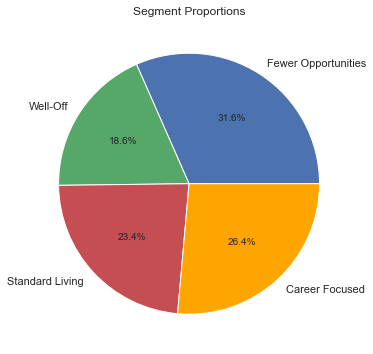

In [15]:
# We plot the segment proportions as a pie chart.
# We can easily see which is the largest segment and the relative sizes of each segment.
plt.figure(figsize=(9, 6))
plt.pie(segm_prop['Segment_Proportion'],
        labels=['Fewer Opportunities', 'Well-Off', 'Standard Living', 'Career Focused'],
        autopct='%1.1f%%',
        colors=('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')

5 - Purchase Occasion and Purchase Incidence Analysis

In [16]:
# We'll find quantitive measures to describe the purchase behaviour by segements
# How often a person from a particular segement visits store - how often they make a purchase
# Mean - Avg behaviour of each segement
# Std dev - how homogeneous each segement is

In [17]:
segments_count = df_purchase_descr.groupby(['Segment']).count()
segments_count
# Nothing Productive => we'll try mean

,Number_Visits,Number_Purchases,Average_Number_Purchase,Labels
Segment,,,,
0.0,158,158,158,158
1.0,93,93,93,93
2.0,117,117,117,117
3.0,132,132,132,132


In [18]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean['Labels'] = pd.DataFrame(segments_mean.index.values)[0].map({0.0: 'Fewer Opportunities',
                                                                            1.0: 'Well Off',
                                                                            2.0: 'Standard Living',
                                                                            3.0: 'Career Focused'})
segments_mean

,Number_Visits,Number_Purchases,Average_Number_Purchase,Labels
Segment,,,,
0.0,114.829114,22.658228,0.199807,Fewer Opportunities
1.0,121.311828,40.473118,0.310436,Well Off
2.0,120.829060,35.760684,0.268472,Standard Living
3.0,114.628788,23.560606,0.205943,Career Focused


In [19]:
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std['Labels'] = pd.DataFrame(segments_std.index.values)[0].map({0.0: 'Fewer Opportunities',
                                                                            1.0: 'Well Off',
                                                                            2.0: 'Standard Living',
                                                                            3.0: 'Career Focused'})
segments_std

,Number_Visits,Number_Purchases,Average_Number_Purchase,Labels
Segment,,,,
0.0,17.380417,12.905720,0.113057,Fewer Opportunities
1.0,31.704128,39.696838,0.189086,Well Off
2.0,38.485620,46.077081,0.194638,Standard Living
3.0,17.176855,13.622084,0.113260,Career Focused


Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

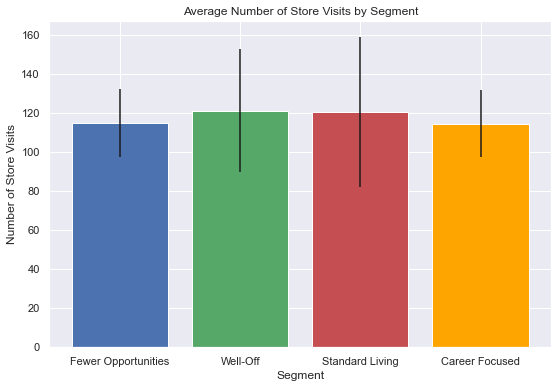

In [20]:
# We plot the average number of store visits for each of the four segments using a bar chart.
# We display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize=(9, 6))
plt.bar(x=(0, 1, 2, 3),
        tick_label=('Fewer Opportunities', 'Well-Off', 'Standard Living', 'Career Focused'),
        height=segments_mean['Number_Visits'],
        yerr=segments_std['Number_Visits'],
        color=('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number of Purchases by Segment')

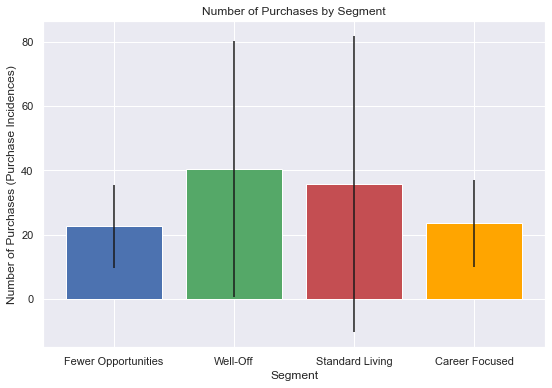

In [21]:
# We display the average number of purchases by segments.
# They will help us understand how often each group buys chocholate candy bars.
plt.figure(figsize=(9, 6))
plt.bar(x=(0, 1, 2, 3),
        tick_label=('Fewer Opportunities', 'Well-Off', 'Standard Living', 'Career Focused'),
        height=segments_mean['Number_Purchases'],
        yerr=segments_std['Number_Purchases'],
        color=('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases (Purchase Incidences)')
plt.title('Number of Purchases by Segment')

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

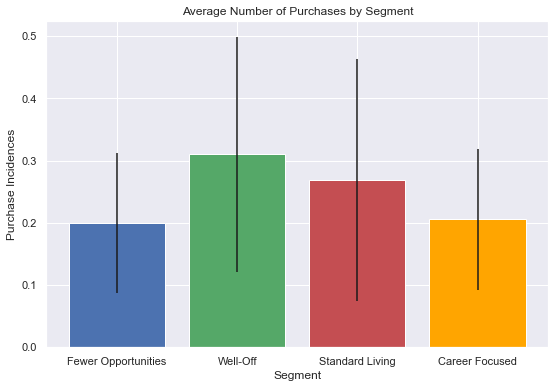

In [22]:
plt.figure(figsize=(9, 6))
plt.bar(x=(0, 1, 2, 3),
        tick_label=('Fewer Opportunities', 'Well-Off', 'Standard Living', 'Career Focused'),
        height=segments_mean['Average_Number_Purchase'],
        yerr=segments_std['Average_Number_Purchase'],
        color=('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

In [23]:
segments_mean

,Number_Visits,Number_Purchases,Average_Number_Purchase,Labels
Segment,,,,
0.0,114.829114,22.658228,0.199807,Fewer Opportunities
1.0,121.311828,40.473118,0.310436,Well Off
2.0,120.829060,35.760684,0.268472,Standard Living
3.0,114.628788,23.560606,0.205943,Career Focused


In [24]:
segments_std

,Number_Visits,Number_Purchases,Average_Number_Purchase,Labels
Segment,,,,
0.0,17.380417,12.905720,0.113057,Fewer Opportunities
1.0,31.704128,39.696838,0.189086,Well Off
2.0,38.485620,46.077081,0.194638,Standard Living
3.0,17.176855,13.622084,0.113260,Career Focused


In [25]:
# We display the average number of purchases.
# We observe, that the ‘well-off’ segment buys products more often. However, once again,
# we see that its standard deviation is the highest.
# It might be that a part of the segment buys products very frequently, and another part less so.
# Although consumers in this segment have a somewhat similar income, the way they might want to spend their money might differ.
# The most homogenous segment appears to be that of the ‘Fewer-Opportunities’.
# This is signified by the segment having the lowest standard deviation or shortest vertical line.
# The first segment seems consistent as well, with about 25 average purchases and a standard deviation of 30.
# What’s worth mentioning is that the ‘career focused’ cluster is very different in both graphs.
# The other 3 segments had a very similar ‘store visits’ information,
# yet it is evident that the well-off cluster actually buys goods more often.

6 - Brand Choice

In [26]:
# Select only rows where incidence is one. In other words, we are only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,3
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,3
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,3
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,3
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,3
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,3
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,3
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,3


In [27]:
brand_choice = df_purchase_incidence[['ID', 'Brand', 'Segment']]
brand_choice

,ID,Brand,Segment
6,200000001,2,3
11,200000001,5,3
19,200000001,1,3
24,200000001,4,3
29,200000001,2,3
...,...,...,...
58621,200000500,2,3
58648,200000500,1,3
58674,200000500,2,3
58687,200000500,2,3


In [28]:
brand_dummies = pd.get_dummies(brand_choice['Brand'], prefix='Brand', prefix_sep='_')
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
6,0,1,0,0,0
11,0,0,0,0,1
19,1,0,0,0,0
24,0,0,0,1,0
29,0,1,0,0,0
...,...,...,...,...,...
58621,0,1,0,0,0
58648,1,0,0,0,0
58674,0,1,0,0,0
58687,0,1,0,0,0


In [29]:
brand_choice = pd.concat([brand_choice, brand_dummies], sort=False, axis=1)
brand_choice = brand_choice.drop(['Brand'], axis=1)
brand_choice

,ID,Segment,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
6,200000001,3,0,1,0,0,0
11,200000001,3,0,0,0,0,1
19,200000001,3,1,0,0,0,0
24,200000001,3,0,0,0,1,0
29,200000001,3,0,1,0,0,0
...,...,...,...,...,...,...,...
58621,200000500,3,0,1,0,0,0
58648,200000500,3,1,0,0,0,0
58674,200000500,3,0,1,0,0,0
58687,200000500,3,0,1,0,0,0


In [30]:
temp = brand_choice.groupby(['ID'], as_index=True).mean()
temp

,Segment,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
ID,,,,,,
200000001,3.0,0.111111,0.444444,0.000000,0.222222,0.222222
200000002,1.0,0.000000,0.090909,0.000000,0.909091,0.000000
200000003,0.0,0.000000,0.800000,0.000000,0.000000,0.200000
200000004,3.0,0.000000,0.090909,0.000000,0.000000,0.909091
200000005,2.0,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...
200000496,0.0,0.050000,0.700000,0.000000,0.050000,0.200000
200000497,3.0,0.023256,0.651163,0.000000,0.302326,0.023256
200000498,0.0,0.128205,0.589744,0.282051,0.000000,0.000000


In [31]:
mean_brand_choice = temp.groupby(['Segment'], as_index=True).mean()
mean_brand_choice['Labels'] = pd.DataFrame(mean_brand_choice.index.values)[0].map({0.0: 'Fewer Opportunities',
                                                                                    1.0: 'Well Off',
                                                                                    2.0: 'Standard Living',
                                                                                    3.0: 'Career Focused'})
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Labels
Segment,,,,,,
0.0,0.175039,0.559845,0.096329,0.057720,0.111067,Fewer Opportunities
1.0,0.042325,0.115925,0.030830,0.497506,0.313415,Well Off
2.0,0.128168,0.227198,0.042239,0.120896,0.481500,Standard Living
3.0,0.131888,0.541077,0.033636,0.157002,0.136397,Career Focused


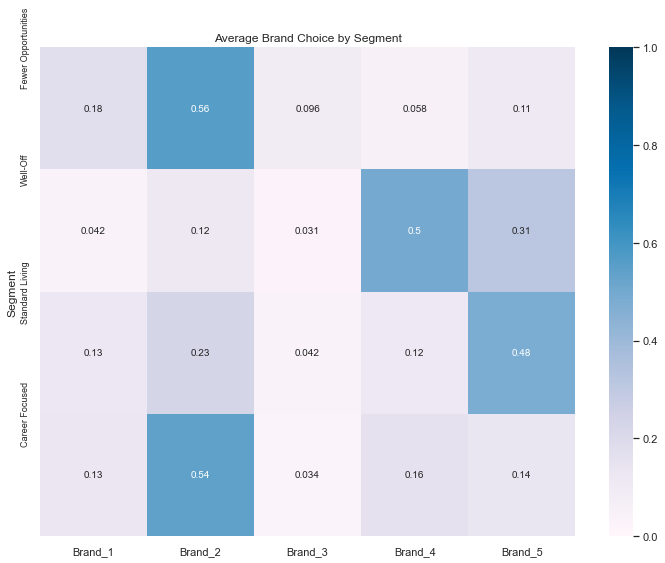

In [32]:
plt.figure(figsize=(12, 9))
sns.heatmap(mean_brand_choice.iloc[:,0:5],
            vmin=0,
            vmax=1,
            cmap='PuBu',
            annot=True)
plt.yticks([0, 1, 2, 3], ['Fewer Opportunities', 'Well-Off', 'Standard Living', 'Career Focused'], rotation=90, fontsize=9)
plt.title('Average Brand Choice by Segment')
plt.show()
# From the dataset we can see that Brand_1 to Brand_5 are arranged from cheapest to most expensive

In [33]:
# Analysis (Segement v Favourite Brand)
# Fewer Opportunities => Brand 2
# Well-Off => Brand 4
# Standard Living => Brand 5
# Career Focused => Brand 2

7 - Revenue

In [34]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased,
# we multiply the price of the brand for that particular day by the quantity of the product purchased.

In [35]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp
# When brand == 1 it means incidence == 1
# If the purchase is not made => there is no brand to show => brand == 0

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,3
556,200000006,636,1,1,5,0,0,1.31,1.56,2.00,...,0,0,0,0,39,1,112347,1,2,2
604,200000007,320,1,1,1,0,0,1.35,1.89,1.98,...,0,0,0,0,27,0,125190,2,1,2
799,200000009,374,1,1,2,0,0,1.21,1.87,2.02,...,0,0,0,0,25,0,108960,0,0,0
858,200000010,60,1,1,3,0,0,1.39,1.90,1.87,...,0,0,0,0,32,0,69370,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58400,200000498,358,1,1,3,0,0,1.10,1.81,2.02,...,0,0,1,1,29,1,114784,1,0,0
58526,200000499,409,1,1,3,0,0,1.33,1.89,2.02,...,0,0,1,0,35,1,73266,0,0,0
58527,200000499,416,1,1,3,1,1,1.34,1.89,2.02,...,0,0,1,0,35,1,73266,0,0,0
58617,200000500,269,1,1,6,0,0,1.37,1.26,1.96,...,0,0,0,0,42,1,120946,1,0,3


In [36]:
temp['Brand Revenue 1'] = temp['Price_1'] * temp['Quantity']
temp

C:\Users\Utkarsh Mishra\AppData\Local\Temp\ipykernel_3708\1614087683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Brand Revenue 1'] = temp['Price_1'] * temp['Quantity']


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Brand Revenue 1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,0,0,0,47,1,110866,1,0,3,2.94
556,200000006,636,1,1,5,0,0,1.31,1.56,2.00,...,0,0,0,39,1,112347,1,2,2,6.55
604,200000007,320,1,1,1,0,0,1.35,1.89,1.98,...,0,0,0,27,0,125190,2,1,2,1.35
799,200000009,374,1,1,2,0,0,1.21,1.87,2.02,...,0,0,0,25,0,108960,0,0,0,2.42
858,200000010,60,1,1,3,0,0,1.39,1.90,1.87,...,0,0,0,32,0,69370,0,0,0,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58400,200000498,358,1,1,3,0,0,1.10,1.81,2.02,...,0,1,1,29,1,114784,1,0,0,3.30
58526,200000499,409,1,1,3,0,0,1.33,1.89,2.02,...,0,1,0,35,1,73266,0,0,0,3.99
58527,200000499,416,1,1,3,1,1,1.34,1.89,2.02,...,0,1,0,35,1,73266,0,0,0,4.02
58617,200000500,269,1,1,6,0,0,1.37,1.26,1.96,...,0,0,0,42,1,120946,1,0,3,8.22


In [37]:
segments_brand_revenue = pd.DataFrame(temp[['Segment', 'Brand Revenue 1']])
segments_brand_revenue

,Segment,Brand Revenue 1
19,3,2.94
556,2,6.55
604,2,1.35
799,0,2.42
858,0,4.17
...,...,...
58400,0,3.30
58526,0,3.99
58527,0,4.02
58617,3,8.22


In [38]:
segments_brand_revenue = segments_brand_revenue.groupby(['Segment'], as_index=False).sum()
segments_brand_revenue

,Segment,Brand Revenue 1
0,0,2759.22
1,1,706.70
2,2,1115.39
3,3,1724.34


In [39]:
# Automate the process for calculating brand 2 to 5
for i in range(2,6):
    column_name_1 = "Brand Revenue " + str(i)
    column_name_2 = "Price_" + str(i)
    temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
    temp.loc[:, column_name_1] = temp[column_name_2] * temp['Quantity']
    segments_brand_revenue[['Segment', column_name_1]] = temp[[
    'Segment', column_name_1]].groupby(['Segment'], as_index=False).sum()

C:\Users\Utkarsh Mishra\AppData\Local\Temp\ipykernel_3708\963662665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, column_name_1] = temp[column_name_2] * temp['Quantity']
C:\Users\Utkarsh Mishra\AppData\Local\Temp\ipykernel_3708\963662665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:, column_name_1] = temp[column_name_2] * temp['Quantity']
C:\Users\Utkarsh Mishra\AppData\Local\Temp\ipykernel_3708\963662665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [40]:
segments_brand_revenue

,Segment,Brand Revenue 1,Brand Revenue 2,Brand Revenue 3,Brand Revenue 4,Brand Revenue 5
0,0,2759.22,9740.39,11514.15,12408.02,15283.72
1,1,706.70,1270.26,1492.71,1624.18,1982.33
2,2,1115.39,3083.94,3648.13,3928.76,4837.98
3,3,1724.34,7673.72,9081.28,9762.98,12052.66


In [41]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Brand Revenue 1'] +
                                            segments_brand_revenue['Brand Revenue 2'] +
                                            segments_brand_revenue['Brand Revenue 3'] +
                                            segments_brand_revenue['Brand Revenue 4'] +
                                            segments_brand_revenue['Brand Revenue 5'])
segments_brand_revenue

,Segment,Brand Revenue 1,Brand Revenue 2,Brand Revenue 3,Brand Revenue 4,Brand Revenue 5,Total Revenue
0,0,2759.22,9740.39,11514.15,12408.02,15283.72,51705.50
1,1,706.70,1270.26,1492.71,1624.18,1982.33,7076.18
2,2,1115.39,3083.94,3648.13,3928.76,4837.98,16614.20
3,3,1724.34,7673.72,9081.28,9762.98,12052.66,40294.98


In [42]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment_Proportion']
segments_brand_revenue['Labels'] = segments_brand_revenue['Segment'].map({0: 'Fewer Opportunities',
                                                                        1: 'Well Off',
                                                                        2: 'Standard Living',
                                                                        3: 'Career Focused'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Brand Revenue 1,Brand Revenue 2,Brand Revenue 3,Brand Revenue 4,Brand Revenue 5,Total Revenue,Segment Proportions,Labels
Segment,,,,,,,,
0,2759.22,9740.39,11514.15,12408.02,15283.72,51705.50,0.316,Fewer Opportunities
1,706.70,1270.26,1492.71,1624.18,1982.33,7076.18,0.186,Well Off
2,1115.39,3083.94,3648.13,3928.76,4837.98,16614.20,0.234,Standard Living
3,1724.34,7673.72,9081.28,9762.98,12052.66,40294.98,0.264,Career Focused
